# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
import matplotlib.pyplot as plt

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
def get_indices(tries = 100):    
    max_var = 0
    for i in range(tries):
        indices = np.random.randint(0, len(data), size=3)
        samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
        var = np.sum(np.var(samples))
        if var > max_var:
            max_var = var
            result = indices
    return result

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
np.random.seed(42)
indices = get_indices()

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,25767,3613,2013,10303,314,1384
2,85,20959,45828,36,24231,1423


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** To get better view I divided total purchase cost by mean for each product category (done below). First customer buys lots of products - all categories way above mean. At the top Detergents_Paper with 14 times the mean, Grocery 11.6 times the mean and Milk - almost 8 times. May be this is some kind of corporate office with a kitchen supplies or a small retailer?

Second customer buys lots of Fresh and Frozen - 2 and 3 times above mean respectively. Perhaps it is ice cream boutique serving frozen yogurts, ice-creams, shakes?

Third customer focuses on buying products in Detergens_Paper, Grocery and Milk categories - all three above mean. It hardly buys Fresh and Frozen products. Perhaps this is an office consuming lots of paper and providing milk, coffee, tea and toast to its employees?

In [6]:
samples / data.mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.343050,7.970131,11.668566,0.333992,14.168696,1.930656
1,2.147197,0.623332,0.253167,3.353916,0.108971,0.907618
2,0.007083,3.615949,5.763602,0.011719,8.409182,0.933194


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import clone

/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
def calculate_r2_score():  
    df = pd.DataFrame()
    regressors = {
        'Linear': LinearRegression(),
        'Lasso' : Lasso(),
        'SVR'   : SVR(kernel='rbf'),
        'DecisionTree' : DecisionTreeRegressor(random_state=42),
        'KNeighbours' : KNeighborsRegressor()
    }
    for name, reg in regressors.iteritems():
        results = []
        for column in data.columns:
            # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
            new_data = data.drop(column, axis = 1).values
            labels = data[column].values

            # TODO: Split the data into training and testing sets using the given feature as the target
            X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size = 0.25, random_state = 42)

            # TODO: Create a decision tree regressor and fit it to the training set        
            regressor = clone(reg)
            regressor.fit(X_train, y_train)

            # TODO: Report the score of the prediction using the testing set
            score = regressor.score(X_test, y_test)
            results.append(score) 
            
        df[name] = results            
    df.index = data.columns
    return df

In [9]:
display(calculate_r2_score())

,KNeighbours,DecisionTree,SVR,Linear,Lasso
Fresh,-0.039012,-0.385750,-0.087528,0.147620,0.147620
Milk,0.395016,0.156275,-0.109087,0.606414,0.606414
Grocery,0.736158,0.681884,-0.139081,0.770648,0.770648
Frozen,0.223119,-0.210136,-0.147547,0.170628,0.170628
Detergents_Paper,0.587160,0.271667,-0.224757,0.702213,0.702213
Delicatessen,-0.038461,-2.254712,-0.078670,-0.145786,-0.145786


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I tried to predict all columns one by one and for comparison used also different regressors. Speaking about DecisionTree: the highest r2 score I got for Grocery as a target category with 0.68 meaning 68% of variance can be explained by using regressor on rest of the categories. 

Other categories scored results below 0.27 with Fresh -0.39 and Delicatessen -2.25 which means regressor is really bad and predicting those from other categories. We cannot infer them using other features.

For comparison I also checked other regressors. LinearRegression and Lasso confirmed Grocery's high r2 score but what is suprising Detergens_Paper reached 0.7 and Milk 0.6. Other regressors perfomed worse. Maybe this is due to the fact that linear regression better deals with noise?

Summarizing: in my opinion we could omit Grocery feature and derive it from others categories. However if we would like to push our model and we would like not to sacrifice 1/3 of variance (1-0.68) we could include this feature as well.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


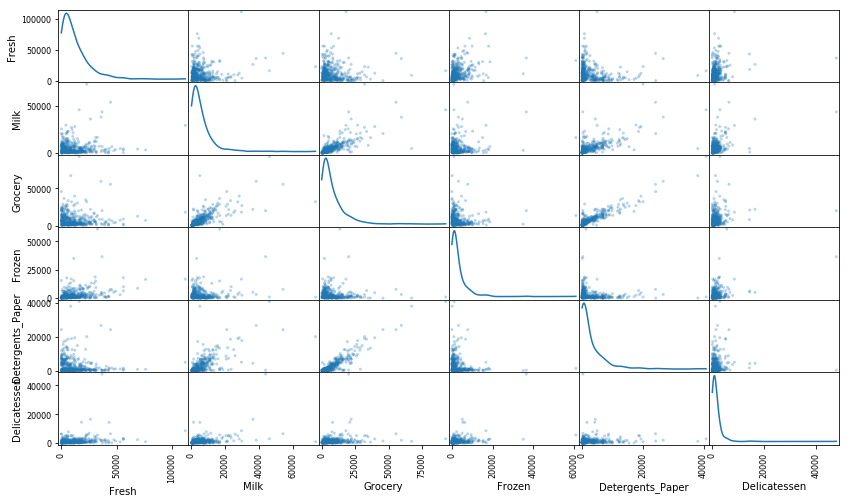

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [11]:
print 'Is distribution skewed right?\n', np.mean(data) > np.median(data, axis = 0)

Is distribution skewed right?
Fresh               True
Milk                True
Grocery             True
Frozen              True
Detergents_Paper    True
Delicatessen        True
dtype: bool


/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


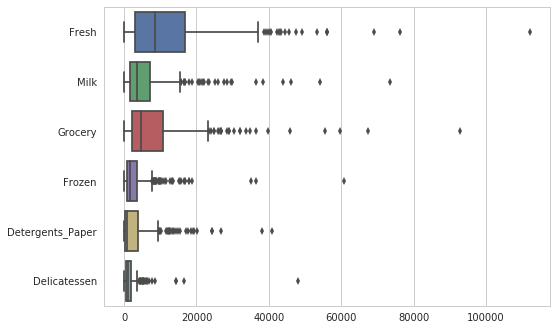

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(data, orient='h')
sns.reset_orig()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** There are 3 features which seem to be correlated to one another: Grocery, Milk and Detergens_Paper. The first one was confirmed by DecisionTree - still we were missing information whether it was correlated with only one category or many. The other two features were confirmed by linear regression. The best correlation is between Grocery and Detergents_Paper but other combinations of those 3 categories also look promising. I must admit I am suprised by the results that these 3 are tied together. Looking at the graph we can clearly see that we can remove one or even two categories and predict customer spending based on third one especially when we remove outliers. Data distribution is skewed right for all features - there are more customers spending below average than above (box plot shows mediam closer to q1 than to q3).

Looking at the Delicatessen combined with any other category we can see that this category total cost is low compared to the other. It would be good to scale features to investigate it. May be this category does not provide high profit but could allow discovering usesful shopping paterns.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


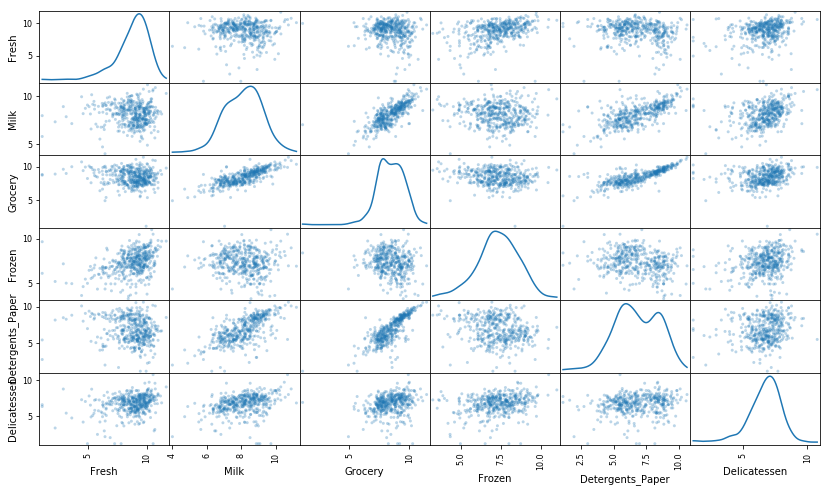

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,10.156850,8.192294,7.607381,9.240190,5.749393,7.232733
2,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers occurances for different categories


154    3
66     2
75     2
128    2
65     2
Name: Outlier index, dtype: int64

Outliers' indices: [ 65  66  81  95  96 128 171 193 218 304 305 338 353 355 357 412  86  98
 154 356  75  38  57 145 175 264 325 420 429 439 161 109 137 142 183 184
 187 203 233 285 289 343]
Sample indices: [ 85 283  65]
Removing outliers: [ 38  57  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171 175
 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355 356
 357 412 420 429 439]


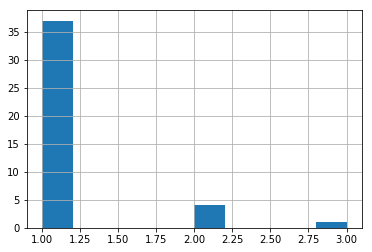

In [81]:
# For each feature find the data points with extreme high or low values
outliers = np.array([])
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    feature_outliers = log_data[(log_data[feature] < Q1 - step) | (log_data[feature] > Q3 + step)].index.values
    outliers = np.concatenate((outliers, feature_outliers))
    
# OPTIONAL: Select the indices for data points you wish to remove
print 'Outliers occurances for different categories'
df = pd.DataFrame(outliers, dtype=int, columns=['Outlier index'])
outlier_occurances = df['Outlier index'].value_counts()
display(outlier_occurances.head())
display(outlier_occurances.hist())


outliers = df['Outlier index'].unique()
print 'Outliers\' indices:', outliers
print 'Sample indices:', indices
outliers = np.setdiff1d(outliers, indices)
print 'Removing outliers:', outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data_all = log_data

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There is 1 data point considered outlier for 3 features, 4 for two and over 35 for one feature. In my opinion all outliers should be removed even those which are related to only one feature. To justify my opinion I would like to point that:
1. An outlier may influence variance and thus PCA. Since principal components are directed according to the data with max variance, outlier may:
    + cause variance to rise and other feature to be reduced or 
    + lower variance and cause this particular feature to be reduced

2.  An outlier can impact clustering and guide to wrong conclusions

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

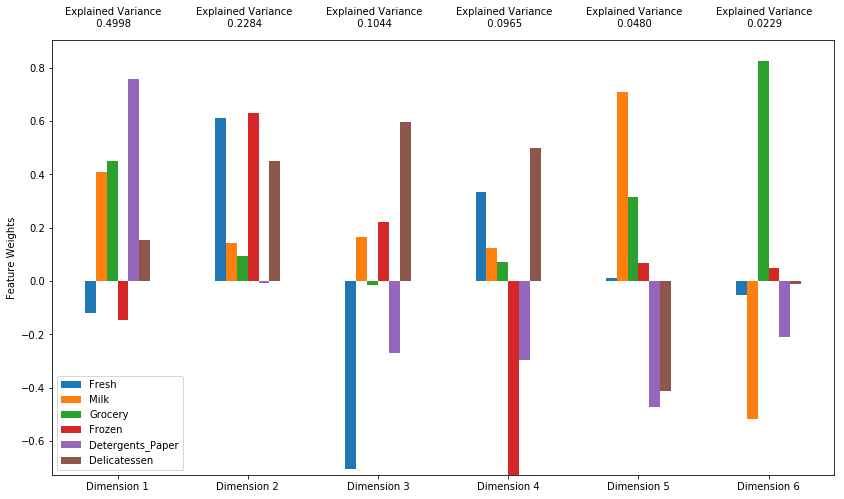

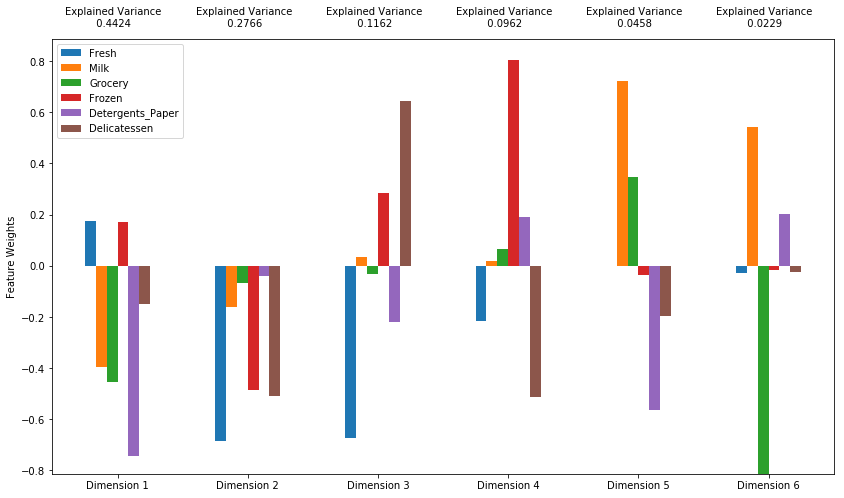

In [83]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

pca_all = PCA(n_components=6)
pca_all.fit(good_data_all)
# Generate PCA results plot
pca_results_all = vs.pca_results(good_data_all, pca_all)

In [17]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4998,-0.1189,0.4082,0.4497,-0.1462,0.7566,0.1524
Dimension 2,0.2284,0.6109,0.1444,0.0953,0.6286,-0.0076,0.4490
Dimension 3,0.1044,-0.7052,0.1638,-0.0141,0.2211,-0.2681,0.5958
Dimension 4,0.0965,0.3355,0.1229,0.0726,-0.7265,-0.2979,0.5006
Dimension 5,0.0480,0.0111,0.7084,0.3168,0.0669,-0.4729,-0.4118
Dimension 6,0.0229,-0.0515,-0.5184,0.8264,0.0490,-0.2080,-0.0107


In [84]:
pca_results_all

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4424,0.1737,-0.3945,-0.4544,0.1722,-0.7455,-0.1494
Dimension 2,0.2766,-0.6851,-0.1624,-0.0694,-0.4877,-0.0419,-0.5097
Dimension 3,0.1162,-0.6735,0.0331,-0.0322,0.2848,-0.2182,0.6446
Dimension 4,0.0962,-0.2143,0.0186,0.0645,0.8061,0.1901,-0.5135
Dimension 5,0.0458,-0.0008,0.7223,0.3480,-0.0362,-0.5637,-0.1954
Dimension 6,0.0229,-0.0293,0.5430,-0.8139,-0.0174,0.2024,-0.0228


In [19]:
pca_results['Explained Variance'][0:2].aggregate(sum)

0.72819999999999996

In [20]:
pca_results['Explained Variance'][0:4].aggregate(sum)

0.92910000000000004

In [21]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,8.922183,8.125835,8.424436,7.419577,6.795801,6.802341
std,1.137153,1.010641,1.017156,1.144828,1.617432,1.028939
min,4.442651,5.303305,5.407172,3.583519,1.609438,3.828641
25%,8.301766,7.376820,7.661997,6.718405,5.574052,6.108120
50%,9.111735,8.192294,8.430109,7.455298,6.669498,6.907755
75%,9.738494,8.836044,9.189066,8.226299,8.214181,7.511524
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


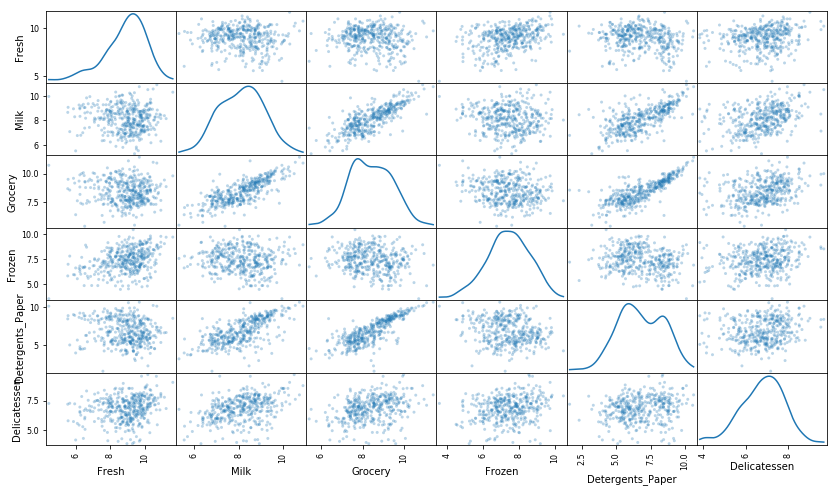

In [22]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


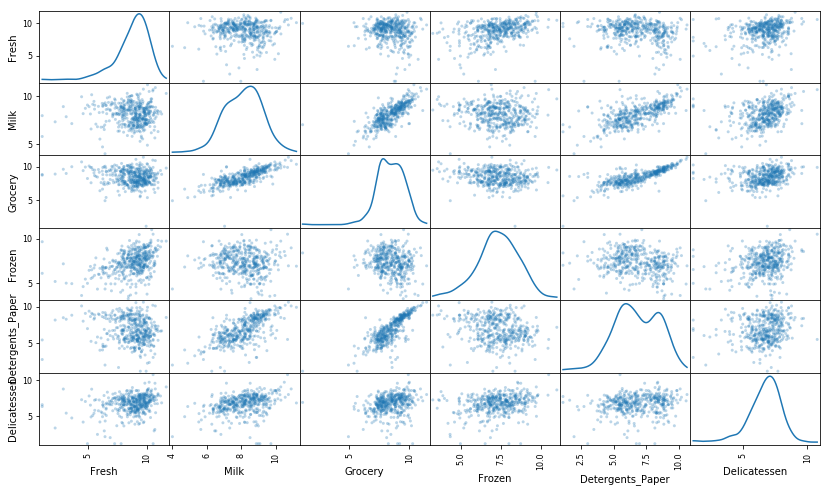

In [86]:
pd.scatter_matrix(good_data_all, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


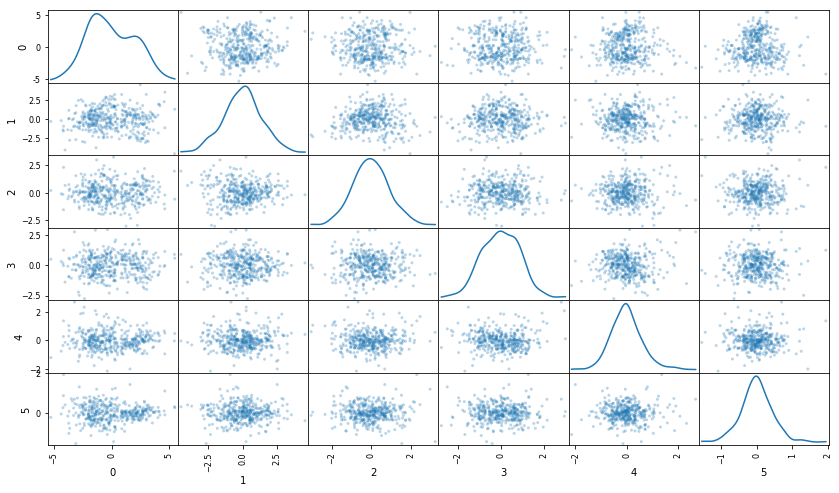

In [23]:
pd.scatter_matrix(pd.DataFrame(pca.transform(good_data)), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

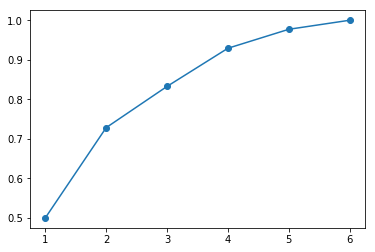

In [24]:
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** First two principal components explain 73% of variance whereas first four explain 93%. 

First dimension explains half of the variance and is dominated by Detergents_Paper category. Also Milk and and Grocery highly contritube to the principal component which confirms previous conclusion that all these 3 categories are correlated. PCA shows high variance of the data and the correlation between features in this dimension which means that we have some customers who purchase a lot of Milk, Grocery and Detergents_Paper products while other customers purchase very few amounts of Milk, Grocery and Detergents_Paper, hence spread in the data. This may suggest retail customers.

Second dimension explains 23% of variance. Increase in this dimension causes 3 major categories to increase namely Fresh, Frozen, Delicatessen. As a result this principal component shows that there seem to be customers who spent much money in those categories (launch bars, ice-cream/coffe shops) and other customers who spent little.

Third dimension accounts for 10.5% of variance and is driven by Fresh and Delicatessen but Principal Component is directed toward negative values for Fresh which means increase in this dimension will cause decrease in Fresh category and increase in Delicatessen. This principal component shows that there are customers who spent more in Fresh product and little in Delicatessen and vice-versa.

Fourth dimension describes 9.8% of variance. Two categories dominate, Frozen with negative weight and Delicatessen with positive one. Increase in this dimension will casue decrease in Grocery but increase in Delicatessen. This conclusion is similar to third dimension - we could indetify customers spending much money on Frozen and little on Delicatessen and quite the opposite.

I also wanted to see good_data scatter matrix and pca transformed data scatter matrix. I noticed two things:
1. Correlaction in first dimension I saw earlier. Correlation in second dimension probably could have been noticed by experienced person. However I was surprised by 3rd and 4th dimension - PCA revealed correlation which cannot be seen easily yet it explains 20% of variance i.e. 20% information lies here.
2. I noticed that looking at columns 0 to 5 on the pca tranformed matrix we can see how the variance decreases.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [25]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.4744,1.3300,-0.5799,0.6049,0.4877,0.2642
1,-1.4793,2.0317,0.0912,-0.4323,0.2413,-0.4710
2,5.4422,-4.4840,1.9654,0.9219,-0.0315,0.3132


In [26]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,25767,3613,2013,10303,314,1384
2,85,20959,45828,36,24231,1423


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [87]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

pca_all = PCA(n_components=2)
pca_all.fit(good_data_all)

# TODO: Transform the good data using the PCA fit above
reduced_data_all = pca_all.transform(good_data_all)

# Create a DataFrame for the reduced data
reduced_data_all = pd.DataFrame(reduced_data_all, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.4744,1.3300
1,-1.4793,2.0317
2,5.4422,-4.4840


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

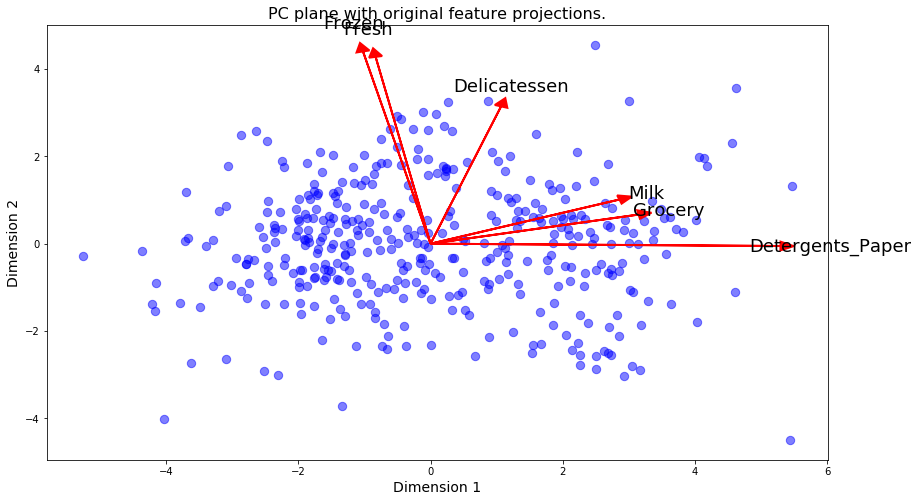

In [29]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

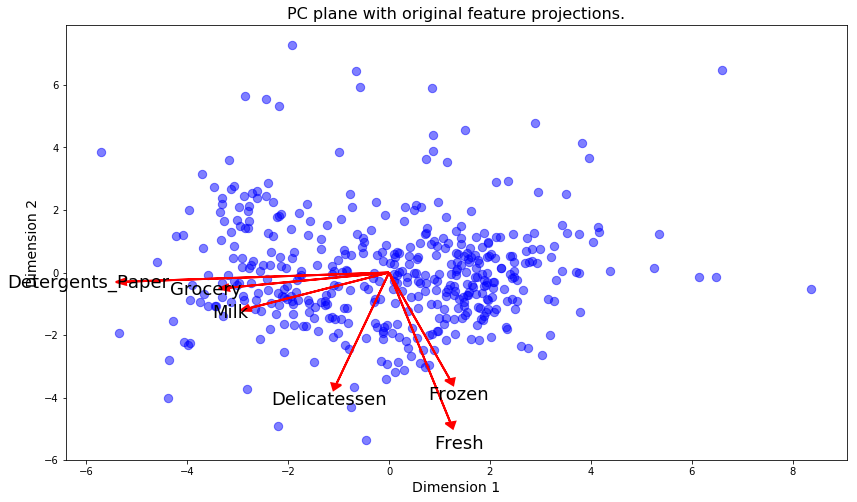

In [88]:
# Create a biplot
vs.biplot(good_data_all, reduced_data_all, pca_all)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means uses distance between samples to cluster data. Each sample belongs only to one cluster. In terms of speed and scalability K-means can deal with very large number of samples (source: http://scikit-learn.org/stable/modules/clustering.html). Also we can use Minibatch K-Means with similar results but this version can deal with medium number of clusters.

Guassian Mixture Model takes into account mean and variance to cluster data. A sample can belong to different clusters with different probability which is called soft clustering. This algorithms is not scalable. What is more there is one drawback on the page(http://scikit-learn.org/stable/modules/mixture.html#mixture):

``` When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
```

In the Biplot we can see customers in the "corners" i.e. scoring high/low in both dimensions. Since principal components have totally different feature/category weights they may be seen as different segments. I would choose GMM as a customer may be assigned to different clusters i.e. segments at the same time. Additionally we don't have large dataset so the scalability is not a problem for this algorithm.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
clusterer = GaussianMixture(n_components=2, random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### All data - KMeans

In [102]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3, random_state=42)
clusterer.fit(reduced_data_all)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data_all)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_all, preds)

### All data - GMM 3 components

In [98]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
clusterer = GaussianMixture(n_components=3, random_state=42)
clusterer.fit(reduced_data_all)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data_all)

# TODO: Find the cluster centers
centers = clusterer.means_
print 'Weights:', clusterer.weights_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_all, preds)

Weights: [ 0.33040212  0.16507358  0.5045243 ]


In [93]:
print score, sample_preds

0.41057253381 [1 0 1]


In [79]:
def find_best_clusterer():
    k_range = range(2, 11)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    plt.figure(figsize=(14,10))
    for i, cv_type in enumerate(cv_types):
        scores = []
        bic = []
        for k in k_range:
            clusterer = GaussianMixture(n_components=k, covariance_type=cv_type, random_state=42)
            clusterer.fit(reduced_data)    
            score = silhouette_score(reduced_data, clusterer.predict(reduced_data))    
            scores.append(score)
            bic.append(clusterer.bic(reduced_data))        
        plt.subplot(241 + i*2)
        plt.plot(k_range, scores, marker='o', c = 'b')
        plt.xticks(k_range)
        plt.xlabel('Number of components')
        plt.ylabel('Silhouette score')
        plt.subplot(242 + i*2)
        plt.plot(k_range, bic, marker = 'x', c= 'r')
        plt.xlabel('Number of components')
        plt.ylabel('BIC')
        print cv_type, np.max(scores), np.min(bic)

In [90]:
def find_best_clusterer_all():
    k_range = range(2, 11)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    plt.figure(figsize=(14,10))
    for i, cv_type in enumerate(cv_types):
        scores = []
        bic = []
        for k in k_range:
            clusterer = GaussianMixture(n_components=k, covariance_type=cv_type, random_state=42)
            clusterer.fit(reduced_data_all)    
            score = silhouette_score(reduced_data_all, clusterer.predict(reduced_data_all))    
            scores.append(score)
            bic.append(clusterer.bic(reduced_data_all))        
        plt.subplot(241 + i*2)
        plt.plot(k_range, scores, marker='o', c = 'b')
        plt.xticks(k_range)
        plt.xlabel('Number of components')
        plt.ylabel('Silhouette score')
        plt.subplot(242 + i*2)
        plt.plot(k_range, bic, marker = 'x', c= 'r')
        plt.xlabel('Number of components')
        plt.ylabel('BIC')
        print cv_type, np.max(scores), np.min(bic)

spherical 0.419863761406 3644.11694333
tied 0.414310961589 3691.35644673
diag 0.412866116018 3655.79827565
full 0.41057253381 3664.21844023


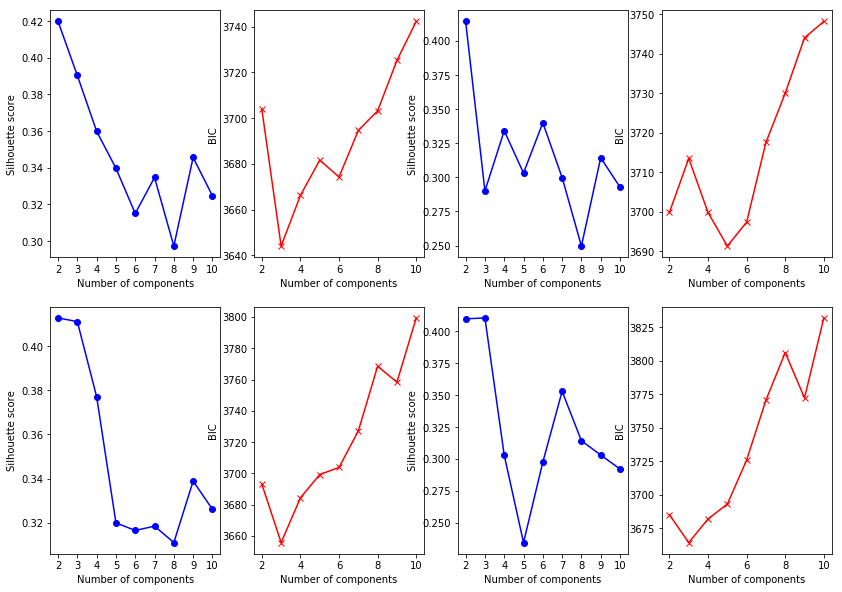

In [91]:
find_best_clusterer_all()

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** I checked range of cluster numbers - please take a look at the plot above. The best score is  0.45 for 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

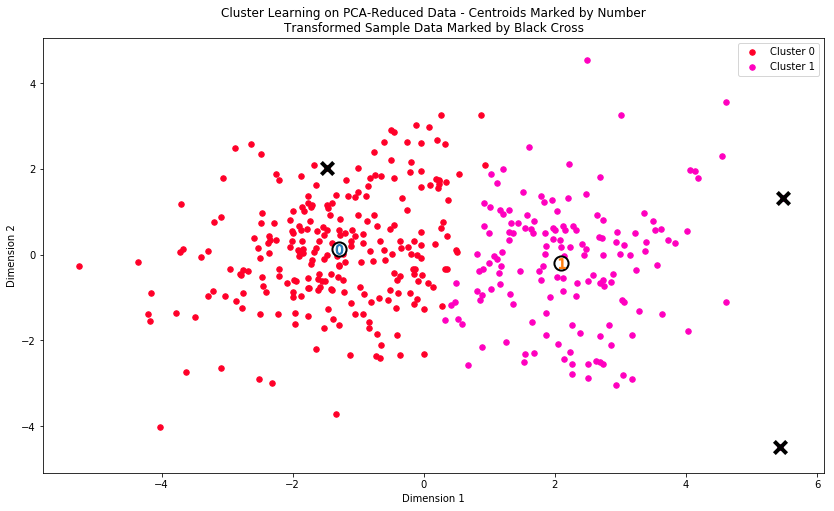

In [37]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

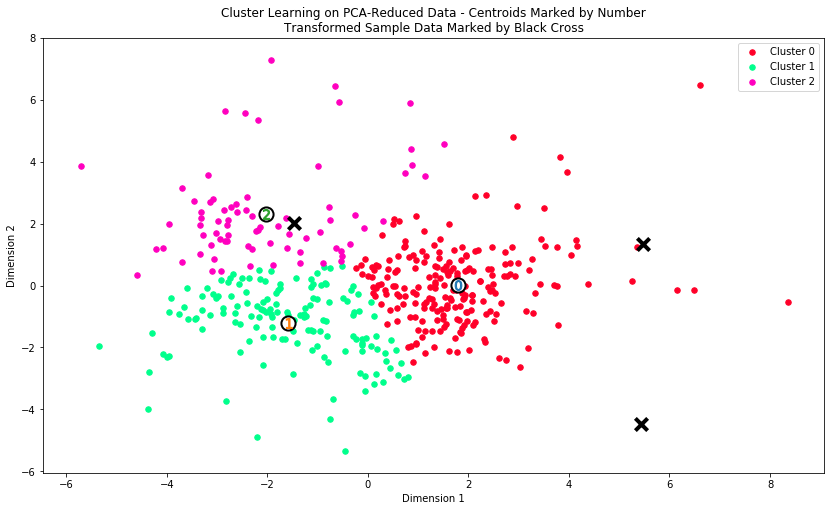

In [103]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data_all, preds, centers, pca_samples)

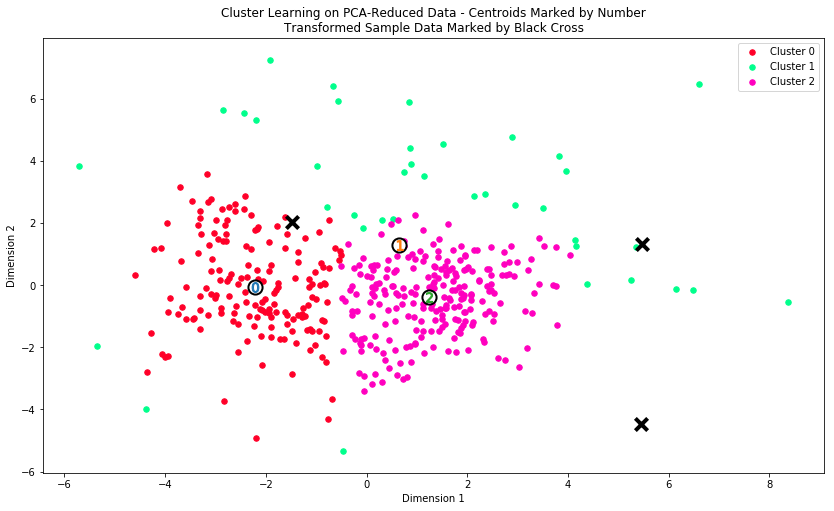

In [97]:
# non reduced data
vs.cluster_results(reduced_data_all, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [38]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(clusterer.means_)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9426.0,2032.0,2581.0,2178.0,336.0,781.0
Segment 1,5174.0,7708.0,11443.0,1084.0,4352.0,1131.0


In [39]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** There are two clusters separated by a line almost perpendicular to dimension 1 so it splits data according to dimension 1 and its associated features. What's more dimension 2 has no impact on clustering. That is why we will find customers scoring both high and low in this dimension in both clusters.

Cluster 1 is described by positive values of first dimension i.e. is correlated to higher purchase of products in categories: Detergents_Paper, Grocery, Milk. The corresponding representative data point for Segment 1 has total purchase cost in those categories above 75th percentile. In my opinion establisments could be: offices of various companies, corporations which provide kitchen with supplies like coffe, tee, milk, water, toastes.

On the contrary cluster 0 is the opposite of cluster 1 - lower values of first dimension i.e. values in Detergents_Paper, Milk, Gocery around or below 25th percentile. Also customers in this segment buy more Fresh and Frozen products since those categories have negative weights for first dimension i.e. decrease in first dimension causes increase in those categories. Establishments in this segment spend less in general and tend to buy more Fresh, Frozen than Milk, Grocery, Detergents_Paper: salad bars, burger vans, cafes.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [40]:
# Display the predictions
sample_preds_proba = clusterer.predict_proba(pca_samples)
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred, 'probability', np.round(sample_preds_proba[i][pred] * 100, 2)

Sample point 0 predicted to be in Cluster 1 probability 100.0
Sample point 1 predicted to be in Cluster 0 probability 99.39
Sample point 2 predicted to be in Cluster 1 probability 100.0


In [41]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,25767,3613,2013,10303,314,1384
2,85,20959,45828,36,24231,1423


In [42]:
display(np.sum(samples, axis = 1))

0    199891
1     43394
2     92562
dtype: int64

**Answer:** Sample 0 and 2 belong to segment 1 with 100% probability and have maximum values on dimension 1 which means they buy huge amount of products related to categories associated with segment 1. We can see that this is confirmed by data above.

Sampole 1 belongs to segment 0 with 99.4% probability. This cusomer should spend less and buy more Fresh/Frozen then Milk/Grocery/Detergents_Paper. This is also backed up by data above.

In my opinion it would be good to use GMM probability information and introduce "no man's land" in the graph (done below) i.e. see points close to both segments at the same time. It turned out there are few samples in the probability range .4-.6.

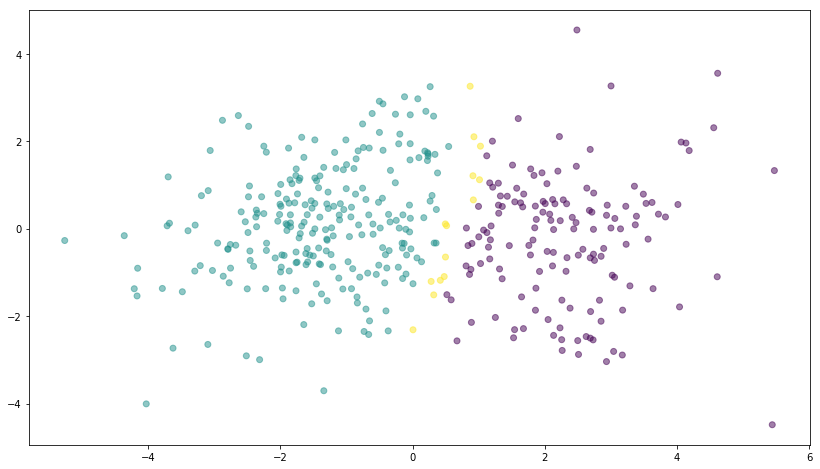

In [43]:
fig, ax = plt.subplots(figsize = (14,8))
colors = [0 if c < 0.4 else 1 if c > 0.6 else 2 for c in clusterer.predict_proba(reduced_data)[:,0]]
plt.scatter(reduced_data.values[:,0], reduced_data.values[:,1], c = colors, alpha =.5)

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

In [44]:
ab_test = pd.DataFrame(preds, index = reduced_data.index, columns=['Segment'])
#display(ab_test.head())
seg0, seg1 = ab_test[ab_test['Segment'] == 0], ab_test[ab_test['Segment'] == 1]
to_be_drawn = int(np.minimum(len(seg0), len(seg1)) * .2)
print 'Samples to be drawn from each segment:', to_be_drawn
#display(seg0.head()), display(seg1.head())
ab_test_seg0, ab_test_seg1 = seg0.sample(to_be_drawn), seg1.sample(to_be_drawn)
ab_test_seg0['Delivery'], ab_test_seg1['Delivery'] = 'old', 'old'
ab_test_seg0.loc[ab_test_seg0.sample(to_be_drawn / 2).index]['Delivery'] = 'new'
ab_test_seg1.loc[ab_test_seg1.sample(to_be_drawn / 2).index]['Delivery'] = 'new'
#display(ab_test_seg0), display(ab_test_seg1)
ab_test_seg0.set_value(ab_test_seg0.sample(to_be_drawn / 2).index, 'Delivery','new')
ab_test_seg1.set_value(ab_test_seg1.sample(to_be_drawn / 2).index, 'Delivery','new')
display(ab_test_seg0.head())
display(ab_test_seg1.head())

Samples to be drawn from each segment: 30


,Segment,Delivery
177,0,old
187,0,old
22,0,old
261,0,new
166,0,old


,Segment,Delivery
48,1,old
167,1,new
75,1,new
275,1,old
394,1,new


**Answer:** Segment 1 is related to bigger shoppers buying non decaying quickly products Detergens_Paper, Grocery, Milk. Customers probably buy in bulk, the products have longer best-before date thus this segment wouldn't be affected much.

On the other hand segment 0 is related to Fresh, Frozen product and rather smaller shoppers. They need product just in time so they may react negatively on the change.

To verify this asumptions distributor could try A/B testing with the following plan (I tried to implement it above):
1. randomly choose some small percentage of customers from each segment - e.g. 30
2. take each group and randomly split customers into test and control group - eg. 15 customers per test/control group
3. try current delivery service for control groups, and new for test groups
4. gather data e.g. total cost per category or all categories and perform statistical test whether change is statistically significant. Other idea would be to survey customers how happy are they from delivery service

Of course noone likes getting fewer options than before so the distrubutor probably would need to apply some delivery cost reductions to compensate new delivery scheme.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** We could train classifier, the features would be total cost in different categories and target label would be a segment. During inference we could predict customer segment based on the features.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

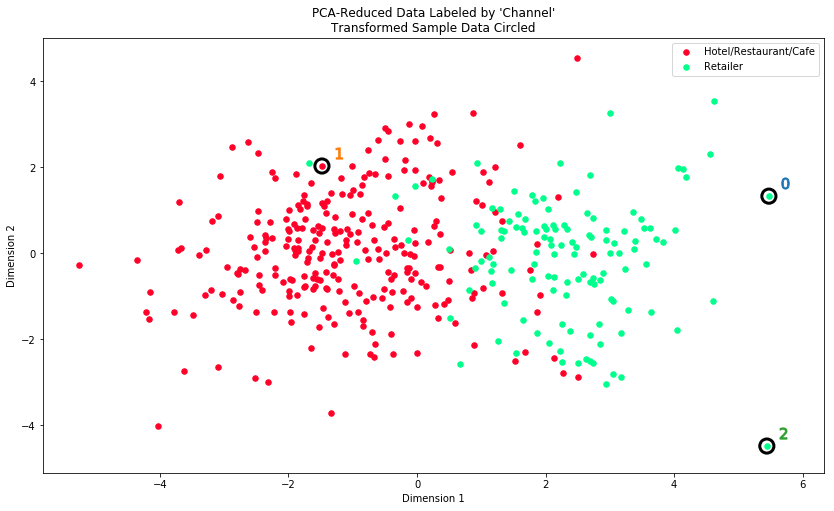

In [45]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** I am amazed how well the clustering worked. Number of clusters is identical to number of channels. In my opinion 90-95% of data confirmes that clustering segments match channel segments. 5-10% of points though could be wrongly classified or could pertain to both segments. All samples points were clustered correctly.

I was only struggling with naming segment 1 as retailers - I assumed wholesale distrubutor is already a ratailer (maybe it is due to the fact I'm not native English speaker).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.